In [2]:
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats as stats
from scipy.stats import linregress

In [3]:
#CSV files
schooling_data_path = "data/mean-years-of-schooling.csv"
working_hours_data_path = "data/working_hours_KK.csv"
edu_level_data_path = "data/wrk_hrs_edu_new.csv"

# Read in the data
schooling = pd.read_csv(schooling_data_path)
working_hours = pd.read_csv(working_hours_data_path)
edu_level = pd.read_csv(edu_level_data_path)

#Combine the data into a single dataset
all_data = pd.merge(schooling, working_hours, how="left", on=["Year", "Year"])

#Drop years with no schooling data
all_data_new = all_data.dropna()
all_data_new.head(5)

,Entity_x,Code_x,Year,Total Years of Schooling,Entity_y,Code_y,Annual Working Hours
0,United States,USA,1870,3.70,United States,USA,3096.000
2,United States,USA,1880,4.49,United States,USA,3044.000
4,United States,USA,1890,5.45,United States,USA,2983.000
6,United States,USA,1900,6.48,United States,USA,2938.000
16,United States,USA,1950,8.13,United States,USA,1989.238


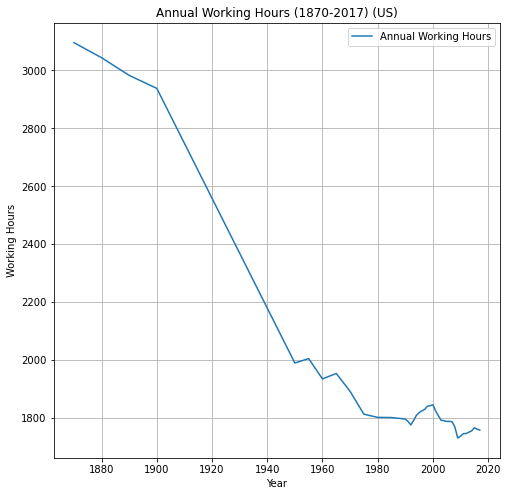

<Figure size 432x288 with 0 Axes>

In [4]:
wh_time_plot = all_data_new.plot(kind="line", x="Year", xlabel="Year", y="Annual Working Hours", ylabel="Working Hours", grid=True, figsize=(8,8), 
               title="Annual Working Hours (1870-2017) (US)")
wh_time_plot.xaxis.get_label().set_visible(True)
wh_time_plot.yaxis.get_label().set_visible(True)
plt.show()
plt.savefig('wh_time_line_plot.png')

The regression line equation is: y = -133.39x +3474.69
The correlation coefficient (r) is: -0.9269304430483828
The r-squared is: 0.8592000462498712


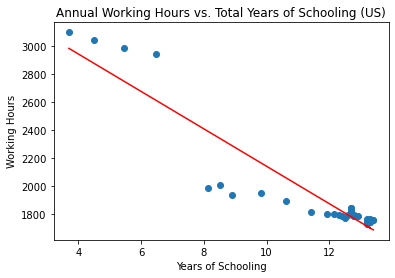

In [5]:
x=all_data_new["Total Years of Schooling"]
y=all_data_new["Annual Working Hours"]
(edu_wh_slope, edu_wh_intercept, edu_wh_rvalue, edu_wh_pvalue, edu_wh_stderr) = linregress(x,y)
regress_values = x * edu_wh_slope + edu_wh_intercept
line_eq = "y = " + str(round(edu_wh_slope,2)) + "x +" + str(round(edu_wh_intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.title("Annual Working Hours vs. Total Years of Schooling (US)")
plt.xlabel("Years of Schooling")
plt.ylabel("Working Hours")
print(f"The regression line equation is: {line_eq}")
print(f"The correlation coefficient (r) is: {edu_wh_rvalue}")
print(f"The r-squared is: {edu_wh_rvalue**2}")
plt.savefig('wh_edu_scatter.png')
plt.show()

In [6]:
#Import new dataset analyzing hours worked by educational attainment
edu_level.head()

,Educational Attainment,Total Employed,Number (Average Day),Percent of Employed (Average Day),Average hours of work (Average Day),Number (Average Weekday),Percent of Employed (Average Weekday),Average hours of work (Average Weekday),"Number (Average Sat, Sun, Holiday)","Percent of Employed (Average Sat, Sun, Holiday)","Average hours of work (Average Sat, Sun, Holiday)"
0,Less than a high school diploma,"10,339","6,832",66.1,8.07,"8,503",82.2,8.12,"2,950",28.5,7.74
1,"High school graduates, no college","36,458","24,095",66.1,8.11,"29,360",80.5,8.43,"11,370",31.2,6.12
2,Some college or associate degree,"34,223","22,597",66.0,7.82,"27,625",80.7,8.14,"10,555",30.8,5.79
3,Bachelor's degree and higher,"63,210","45,069",71.3,7.36,"55,153",87.3,7.91,"21,501",34.0,4.04
4,Bachelor's degree only,"36,985","25,713",69.5,7.57,"31,432",85.0,8.04,"12,165",32.9,4.68


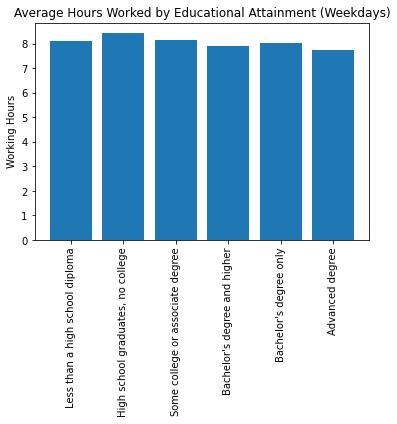

In [8]:
#Average hours spent working (weekdays) by educational attainment
y=edu_level["Average hours of work (Average Weekday)"]
x=edu_level["Educational Attainment"]
plt.title('Average Hours Worked by Educational Attainment (Weekdays)')
plt.bar(x,y)
plt.xticks(rotation=90)
plt.ylabel("Working Hours")
plt.savefig('wh_wkdy_bar.png')

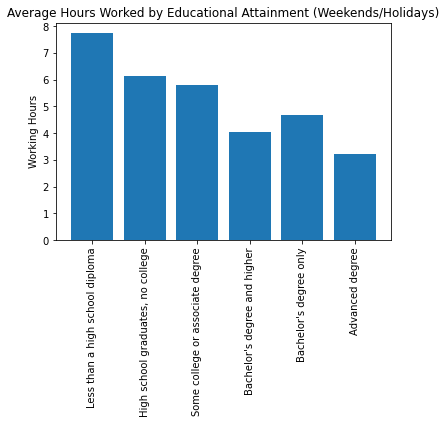

In [9]:
#Average hours spent working (weekends/holidays) by educational attainment
y=edu_level["Average hours of work (Average Sat, Sun, Holiday)"]
x=edu_level["Educational Attainment"]
plt.title('Average Hours Worked by Educational Attainment (Weekends/Holidays)')
plt.bar(x,y)
plt.xticks(rotation=90)
plt.ylabel("Working Hours")
plt.savefig('wh_wknd_bar.png')

In [10]:
#Input observed values
observed = pd.Series([7.74,6.12,5.79,4.04,4.68,3.23], index=["Less than a high school diploma", "High school graduates, no college", "Some college or associate degree","Bachelor's degree and higher","Bachelor's degree only","Advanced Degree"])

In [11]:
wknd_hours_df = pd.DataFrame([observed]).T

In [12]:
## Input expected values
wknd_hours_df[1] = 5.27

In [13]:
# Rename columns
wknd_hours_df.columns = ["observed", "expected"]
wknd_hours_df

,observed,expected
Less than a high school diploma,7.74,5.27
"High school graduates, no college",6.12,5.27
Some college or associate degree,5.79,5.27
Bachelor's degree and higher,4.04,5.27
Bachelor's degree only,4.68,5.27
Advanced Degree,3.23,5.27


In [14]:
# The degree of freedom is 6-1 = 5
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 5)
critical_value

11.070497693516351

In [15]:
# Run the chi square test with stats.chisquare()
stats.chisquare(wknd_hours_df["observed"], wknd_hours_df["expected"])

Power_divergenceResult(statistic=2.48888045540797, pvalue=0.7781687577075137)

# Life Expectancy

In [3]:
#LIFE EXPECTANCY
#Read annual working hours per worker on the world
WH_data = pd.read_csv('data/annual-working-hours-per-worker.csv')
WH_data.head()

,Entity,Code,Year,Average annual working hours per worker
0,Argentina,ARG,1950,2034.0000
1,Argentina,ARG,1951,2037.8667
2,Argentina,ARG,1952,2041.7408
3,Argentina,ARG,1953,2045.6223
4,Argentina,ARG,1954,2049.5112


In [4]:
#Filter only for USA
filt=(WH_data["Code"]=='USA')
WH_USA_df=WH_data[filt]
WH_USA_df.head()

,Entity,Code,Year,Average annual working hours per worker
3263,United States,USA,1870,3096.0
3264,United States,USA,1880,3044.0
3265,United States,USA,1890,2983.0
3266,United States,USA,1900,2938.0
3267,United States,USA,1913,2900.0


In [5]:
#Checking Results
WH_USA_df.shape

(75, 4)

In [6]:
#Read life expectancy on the world
LE_data = pd.read_csv('data/life-expectancy.csv')
LE_data.head()

,Entity,Code,Year,Life expectancy
0,Afghanistan,AFG,1950,27.638
1,Afghanistan,AFG,1951,27.878
2,Afghanistan,AFG,1952,28.361
3,Afghanistan,AFG,1953,28.852
4,Afghanistan,AFG,1954,29.350


In [7]:
#Filter only for USA
filt=(LE_data["Code"]=='USA')
LE_USA_df=LE_data[filt]
LE_USA_df.head()

,Entity,Code,Year,Life expectancy
17980,United States,USA,1880,39.410000
17981,United States,USA,1890,45.209999
17982,United States,USA,1901,49.299999
17983,United States,USA,1902,50.500000
17984,United States,USA,1903,50.599998


In [8]:
#Checking Results
LE_USA_df.shape

(121, 4)

In [9]:
#Merging both data frames, dropping NaN
data_combined_df=pd.merge(WH_USA_df, LE_USA_df, how="outer", on="Year")
data_combined_df.dropna(inplace=True)
data_combined_df

,Entity_x,Code_x,Year,Average annual working hours per worker,Entity_y,Code_y,Life expectancy
1,United States,USA,1880,3044.0000,United States,USA,39.410000
2,United States,USA,1890,2983.0000,United States,USA,45.209999
4,United States,USA,1913,2900.0000,United States,USA,53.500000
5,United States,USA,1929,2316.0000,United States,USA,58.500000
6,United States,USA,1938,1756.0000,United States,USA,62.389999
...,...,...,...,...,...,...,...
70,United States,USA,2013,1750.0786,United States,USA,78.909000
71,United States,USA,2014,1754.4224,United States,USA,78.922000
72,United States,USA,2015,1765.1826,United States,USA,78.910000
73,United States,USA,2016,1760.7960,United States,USA,78.885000


In [10]:
#Checking Column names
list(data_combined_df.columns)

['Entity_x',
 'Code_x',
 'Year',
 'Average annual working hours per worker',
 'Entity_y',
 'Code_y',
 'Life expectancy']

In [11]:
#Drop not use columns and rename columns left
data_combined_df.drop(['Entity_y', 'Code_y'], axis=1, inplace=True)
data_combined_df.rename(columns = {'Entity_x':'Country', 'Code_x':'Country Code'}, inplace = True) 
data_combined_df.head()

,Country,Country Code,Year,Average annual working hours per worker,Life expectancy
1,United States,USA,1880,3044.0,39.410000
2,United States,USA,1890,2983.0,45.209999
4,United States,USA,1913,2900.0,53.500000
5,United States,USA,1929,2316.0,58.500000
6,United States,USA,1938,1756.0,62.389999


In [12]:
#Checking results
data_combined_df.shape

(73, 5)

In [13]:
#Extracting data to plot
years=data_combined_df['Year']
work_hours=data_combined_df['Average annual working hours per worker']
life_expectancy=data_combined_df['Life expectancy']

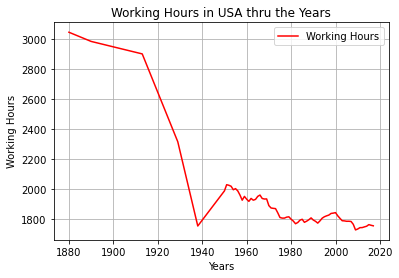

In [14]:
#Plotting working hours in USA and saving plot fig to png format
fig = plt.figure()
plt.title("Working Hours in USA thru the Years")
plt.ylabel("Working Hours")
plt.xlabel("Years")
plt.plot(years,work_hours, color='red', label="Working Hours")
plt.legend(loc="upper right")
plt.grid()
fig.savefig("data/working_hours_USA.png")

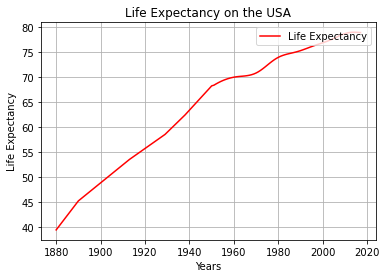

In [15]:
#Plotting Life expectancy on USA and saving plot fig to png format
fig = plt.figure()
plt.title("Life Expectancy on the USA")
plt.ylabel("Life Expectancy")
plt.xlabel("Years")
plt.plot(years,life_expectancy, color='red', label="Life Expectancy")
plt.legend(loc="upper right")
plt.grid()
fig.savefig("data/life_expectancy.png")

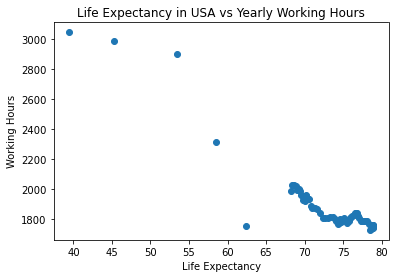

In [16]:
#Correlation between Life Expectancy and Working Hours 
plt.title("Life Expectancy in USA vs Yearly Working Hours")
plt.ylabel("Working Hours")
plt.xlabel("Life Expectancy")
plt.scatter(life_expectancy[:,], work_hours)

The r-squared is: 0.8641435382551297


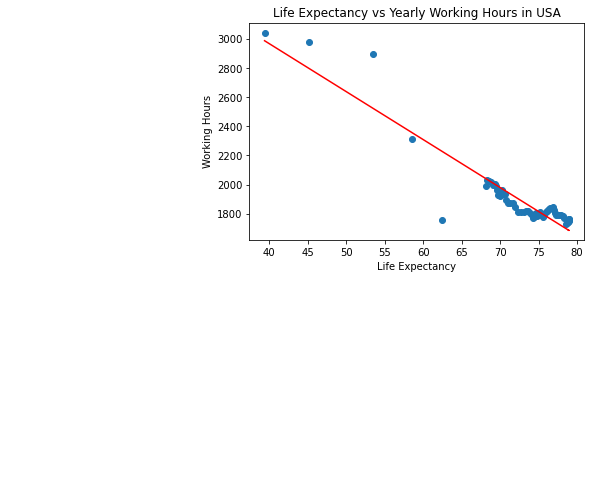

In [17]:
# Add the linear regression equation and line to plot and saving plot fig to png format
fig = plt.figure()
x_values = life_expectancy[:,]
y_values = work_hours
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Life Expectancy vs Yearly Working Hours in USA")
plt.ylabel("Working Hours")
plt.xlabel("Life Expectancy")
print(f"The r-squared is: {rvalue**2}")
fig.savefig("data/life_exp_vs_work_hrs_linear_regression.png")
plt.show()

# Unemployment

In [24]:
#UNEMPLOYMENT
#Read annual working hours per worker on the world
WH_data = pd.read_csv('data/annual-working-hours-per-worker.csv')
WH_data.head()

,Entity,Code,Year,Average annual working hours per worker
0,Argentina,ARG,1950,2034.0000
1,Argentina,ARG,1951,2037.8667
2,Argentina,ARG,1952,2041.7408
3,Argentina,ARG,1953,2045.6223
4,Argentina,ARG,1954,2049.5112


In [25]:
#Filter only for USA
filt=(WH_data["Code"]=='USA')
WH_USA_df=WH_data[filt]
WH_USA_df.head()

,Entity,Code,Year,Average annual working hours per worker
3263,United States,USA,1870,3096.0
3264,United States,USA,1880,3044.0
3265,United States,USA,1890,2983.0
3266,United States,USA,1900,2938.0
3267,United States,USA,1913,2900.0


In [26]:
#Checking Datatypes
WH_USA_df.dtypes

Entity                                      object
Code                                        object
Year                                         int64
Average annual working hours per worker    float64
dtype: object

In [27]:
#Building url to fetch data from the OECD website for USA umeployment rate and printing response
OECD_url='https://stats.oecd.org/SDMX-JSON/data/KEI/LR+LRHUTTTT.USA.ST.A/all?startTime=1914&endTime=2020&dimensionAtObservation=allDimensions'
response = requests.get(OECD_url).json()
print(response)

{'header': {'id': 'e9abb76e-0a37-42c8-adfa-6c3deee0d643', 'test': False, 'prepared': '2021-01-14T23:13:36.9329271Z', 'sender': {'id': 'OECD', 'name': 'Organisation for Economic Co-operation and Development'}, 'links': [{'href': 'https://stats.oecd.org:443/SDMX-JSON/data/KEI/LR+LRHUTTTT.USA.ST.A/all?startTime=1914&endTime=2020&dimensionAtObservation=allDimensions', 'rel': 'request'}]}, 'dataSets': [{'action': 'Information', 'observations': {'0:0:0:0:0': [4.38333333333333, 0, None, 0, 0, None], '0:0:0:0:1': [4.14166666666667, 0, None, 0, 0, None], '0:0:0:0:2': [4.25833333333333, 0, None, 0, 0, None], '0:0:0:0:3': [6.8, 0, None, 0, 0, None], '0:0:0:0:4': [5.475, 0, None, 0, 0, None], '0:0:0:0:5': [5.50833333333333, 0, None, 0, 0, None], '0:0:0:0:6': [6.68333333333333, 0, None, 0, 0, None], '0:0:0:0:7': [5.54166666666666, 0, None, 0, 0, None], '0:0:0:0:8': [5.66666666666667, 0, None, 0, 0, None], '0:0:0:0:9': [5.19166666666667, 0, None, 0, 0, None], '0:0:0:0:10': [4.525, 0, None, 0, 0, Non

In [28]:
Total_val=len(response['dataSets'][0]['observations'])
Total_val

66

In [29]:
#Extracting Year, and unemployment rate from response
Unemp_Rate=[]
Year=[]
Country=[]

for value in range(0,Total_val):
    Unemp_Rate.append(response['dataSets'][0]['observations']["0:0:0:0:"+str(value)][0])
    Country.append("USA")
    Year.append(response['structure']['dimensions']['observation'][4]['values'][value]['id'])

In [30]:
#Building Data Frame
data={'Country':Country, 'Year':Year, 'Unemployment Rate': Unemp_Rate}
Unemp_Rate_df=pd.DataFrame(data)
Unemp_Rate_df.head()

,Country,Year,Unemployment Rate
0,USA,1955,4.383333
1,USA,1956,4.141667
2,USA,1957,4.258333
3,USA,1958,6.800000
4,USA,1959,5.475000


In [31]:
#Checking Datatypes
Unemp_Rate_df.dtypes

Country               object
Year                  object
Unemployment Rate    float64
dtype: object

In [32]:
#Changing Data type
Unemp_Rate_df["Year"] = Unemp_Rate_df["Year"].astype(np.int64)
Unemp_Rate_df.dtypes

Country               object
Year                   int64
Unemployment Rate    float64
dtype: object

In [33]:
#Merging Data frames
data_combined_df=pd.merge(WH_USA_df, Unemp_Rate_df, how="outer", on="Year")
data_combined_df.dropna(inplace=True)
data_combined_df

,Entity,Code,Year,Average annual working hours per worker,Country,Unemployment Rate
12,United States,USA,1955,2004.5018,USA,4.383333
13,United States,USA,1956,1989.3650,USA,4.141667
14,United States,USA,1957,1961.5238,USA,4.258333
15,United States,USA,1958,1927.5476,USA,6.800000
16,United States,USA,1959,1952.8529,USA,5.475000
...,...,...,...,...,...,...
70,United States,USA,2013,1750.0786,USA,7.375000
71,United States,USA,2014,1754.4224,USA,6.166667
72,United States,USA,2015,1765.1826,USA,5.291667
73,United States,USA,2016,1760.7960,USA,4.866667


In [34]:
#Dropping not necessary columns
data_combined_df.drop(['Country'], axis=1, inplace=True)
data_combined_df.rename(columns = {'Code':'Country'}, inplace = True) 
data_combined_df.head()

,Entity,Country,Year,Average annual working hours per worker,Unemployment Rate
12,United States,USA,1955,2004.5018,4.383333
13,United States,USA,1956,1989.3650,4.141667
14,United States,USA,1957,1961.5238,4.258333
15,United States,USA,1958,1927.5476,6.800000
16,United States,USA,1959,1952.8529,5.475000


In [35]:
#Preparing data to plot
years=data_combined_df['Year']
work_hours=data_combined_df['Average annual working hours per worker']
unemployment=data_combined_df['Unemployment Rate']

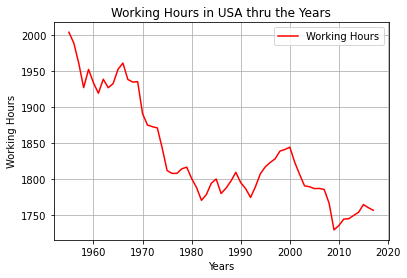

In [36]:
#Plotting working hours in USA and saving plot fig to png format
fig = plt.figure()
plt.title("Working Hours in USA thru the Years")
plt.ylabel("Working Hours")
plt.xlabel("Years")
plt.plot(years,work_hours, color='red', label="Working Hours")
plt.legend(loc="upper right")
plt.grid()
fig.savefig("data/working_hours_USA.png")

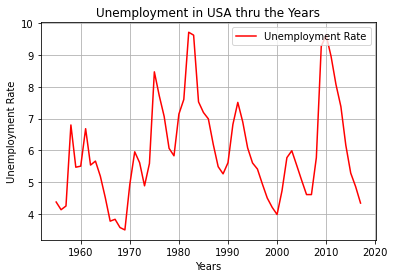

In [37]:
#Plottingunemployment rate in USA and saving plot fig to png format
fig = plt.figure()
plt.title("Unemployment in USA thru the Years")
plt.ylabel("Unemployment Rate")
plt.xlabel("Years")
plt.plot(years,unemployment, color='red', label="Unemployment Rate")
plt.legend(loc="upper right")
plt.grid()
fig.savefig("data/unemployment_rate_USA.png")

The r-squared is: 0.3284193240710849


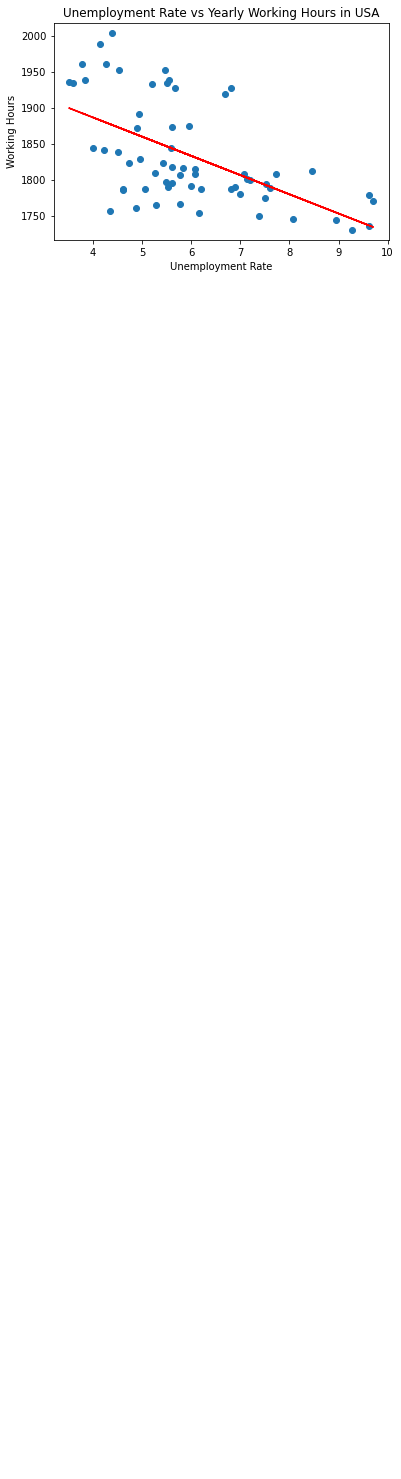

In [38]:

# Add the linear regression equation and line to plot and saving plot fig to png format
fig = plt.figure()
x_values = unemployment
y_values = work_hours
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Unemployment Rate vs Yearly Working Hours in USA")
plt.ylabel("Working Hours")
plt.xlabel("Unemployment Rate")
print(f"The r-squared is: {rvalue**2}")
fig.savefig("data/life_exp_vs_work_hrs_linear_regression.png")
plt.show()